# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Load the Data

In [101]:
df=pd.read_csv('/content/Traffic_Accident.csv')
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [5]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [8]:
df.shape

(52000, 30)

In [10]:
df.duplicated() .sum()

0

In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [41]:
df.drop('Unnamed: 0', axis=1, inplace=True)


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

<Axes: >

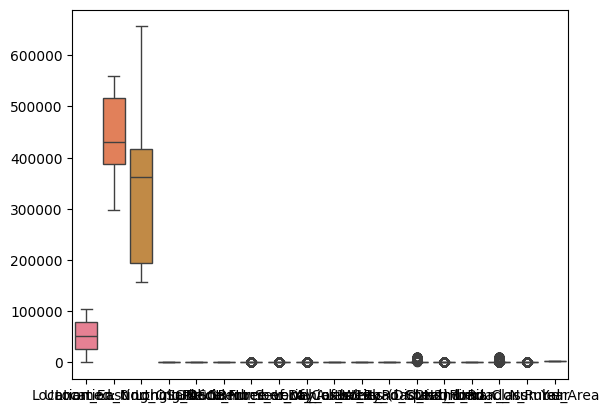

In [16]:
sns.boxplot(df)

In [19]:
def remove_outliers(df, columns):
    for column in columns:
        if df[column].dtype in ['int', 'float']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_check = df

In [20]:
df['Number_of_Vehicles'].unique()

array([ 2.,  1.,  3., nan,  4.,  5.,  8.,  6.,  7.,  9., 18., 11., 10.])

In [26]:
df['Number_of_Vehicles']=df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean())

In [21]:
df['Day_of_Week'].unique()

array([ 1.,  7.,  5.,  3.,  2.,  6.,  4., nan])

In [30]:
df['Day_of_Week']=df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0])

In [22]:
df['Time'].unique()

array(['16:39', '14:25', '10:20', ..., '04:06', '01:14', '04:48'],
      dtype=object)

In [31]:
df['Time']=df['Time'].fillna(df['Time'].mode()[0])

In [23]:
df['Speed_limit'].unique()

array([60., 20., 30., 40., 70., 50., nan])

In [32]:
df['Speed_limit']=df['Speed_limit'].fillna(df['Speed_limit'].mode()[0])

In [24]:
df['Pedestrian_Crossing-Physical_Facilities'].unique()

array(['No physical crossing within 50 meters',
       'Pedestrian phase at traffic signal junction', 'Zebra crossing',
       'non-junction pedestrian crossing', 'Central refuge',
       'Footbridge or subway', nan], dtype=object)

In [34]:
df['Pedestrian_Crossing-Physical_Facilities']=df['Pedestrian_Crossing-Physical_Facilities'].fillna(df['Pedestrian_Crossing-Physical_Facilities'].mode()[0])

In [25]:
df['LSOA_of_Accident_Location'].unique()

array(['E01029654', 'E01009313', 'E01002678', ..., 'E01006211',
       'E01029807', 'E01025595'], dtype=object)

In [35]:
df['LSOA_of_Accident_Location']=df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'].mode()[0])

In [39]:
df['Year']=df['Year'].fillna(df['Year'].mode()[0])
df['Did_Police_Officer_Attend_Scene_of_Accident']=df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(df['Did_Police_Officer_Attend_Scene_of_Accident'].mode()[0])
df['Local_Authority_(District)']=df['Local_Authority_(District)'].fillna(df['Local_Authority_(District)'].mode()[0])
df['Local_Authority_(Highway)']=df['Local_Authority_(Highway)'].fillna(df['Local_Authority_(Highway)'].mode()[0])
df['1st_Road_Class']=df['1st_Road_Class'].fillna(df['1st_Road_Class'].mode()[0])
df['1st_Road_Number']=df['1st_Road_Number'].fillna(df['1st_Road_Number'].mode()[0])
df['Road_Type']=df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['2nd_Road_Class']=df['2nd_Road_Class'].fillna(df['2nd_Road_Class'].mode()[0])
df['2nd_Road_Number']=df['2nd_Road_Number'].fillna(df['2nd_Road_Number'].mode()[0])
df['Light_Conditions']=df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0])
df['Weather_Conditions']=df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])
df['Pedestrian_Crossing-Human_Control']=df['Pedestrian_Crossing-Human_Control'].fillna(df['Pedestrian_Crossing-Human_Control'].mode()[0])
df['Road_Surface_Conditions']=df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Urban_or_Rural_Area']=df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])

In [40]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [44]:
df_numeric = df.select_dtypes(include=['number'])
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
print(df_scaled)

[[-0.86603285 -0.34644717 -0.86421208 ... -0.28278681  1.73293953
   0.        ]
 [-0.39174946 -0.46707276 -0.38607263 ... -0.28278681 -0.57681737
   0.        ]
 [ 1.14832247 -1.39483565  1.12631997 ...  0.09380226 -0.57681737
   0.        ]
 ...
 [ 1.3030192  -1.39336672  1.27865607 ... -0.28278681 -0.57681737
   0.        ]
 [-0.19268234  1.07928514 -0.17031133 ... -0.28278681  1.73293953
   0.        ]
 [ 1.05403541  0.77443765  1.11910233 ... -0.28278681 -0.57681737
   0.        ]]


In [48]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
n_components = df_pca.shape[1]
column_names = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(df_pca, columns=column_names)
print(df_pca)

            PC1       PC2
0      1.922347  2.093131
1      0.127540  0.145281
2     -3.004390  0.412384
3      0.795325  0.429344
4      1.580148  2.879985
...         ...       ...
51995  1.013069 -1.895613
51996  0.800954 -0.122777
51997 -3.229945 -0.046526
51998  1.955333  0.655278
51999 -0.158624  0.293521

[52000 rows x 2 columns]


In [61]:
one_hot_encoder_df=pd.get_dummies(df, columns=['Weather_Conditions','Road_Surface_Conditions'])
print(one_hot_encoder_df)

      Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           2.01E+12               381880.0                298700.0   
1      200520D303703               413520.0                284740.0   
2      200501TX20137               516260.0                177370.0   
3      200520E097001               401530.0                282610.0   
4           2.01E+12               421760.0                320680.0   
...              ...                    ...                     ...   
51995  200511DJ27240               427910.0                515740.0   
51996  20053102C2156               450720.0                340010.0   
51997  200501BS70452               526580.0                177540.0   
51998       2.01E+12               426800.0                463700.0   
51999  2005160D02810               509970.0                428420.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
0      -2.268891  52.585773            21                  3   
1      -1.802453  5

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [64]:
X = df_pca
y = df['Accident_Index']

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

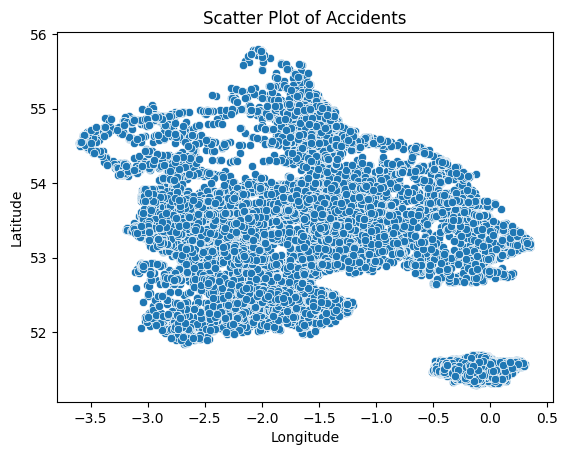

In [88]:
sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Accidents')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

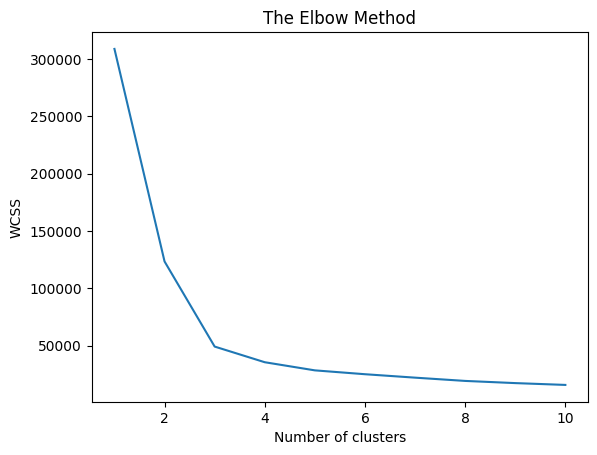

In [66]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42) # Now KMeans is defined
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


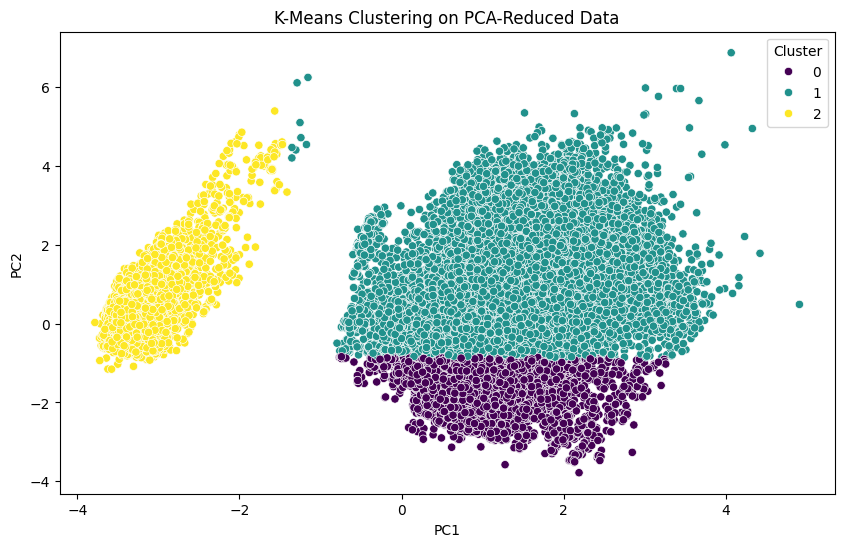

In [94]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.show()


In [86]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[ 8.43322870e-01 -1.58252708e+00 -4.44089210e-14]
 [ 1.25489148e+00  7.87311106e-01  2.60371569e+00]
 [-3.20622933e+00  3.73431845e-01  1.00211369e+00]]


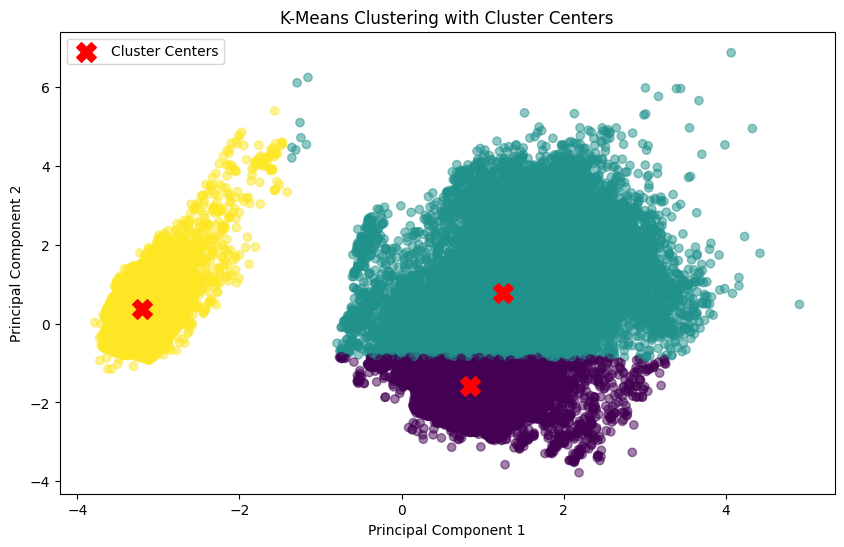

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(X['PC1'], X['PC2'], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with Cluster Centers')
plt.legend()
plt.show()


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [99]:
# Calculate the silhouette score for different numbers of clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the silhouette score is 0.6266


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, the silhouette score is 0.6129


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the silhouette score is 0.5766


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, the silhouette score is 0.5556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, the silhouette score is 0.4966


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, the silhouette score is 0.4170


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, the silhouette score is 0.4160


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, the silhouette score is 0.4156


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10, the silhouette score is 0.4045


## Plot the data points with their predicted cluster center

In [95]:
clusters = kmeans.predict(df_pca)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

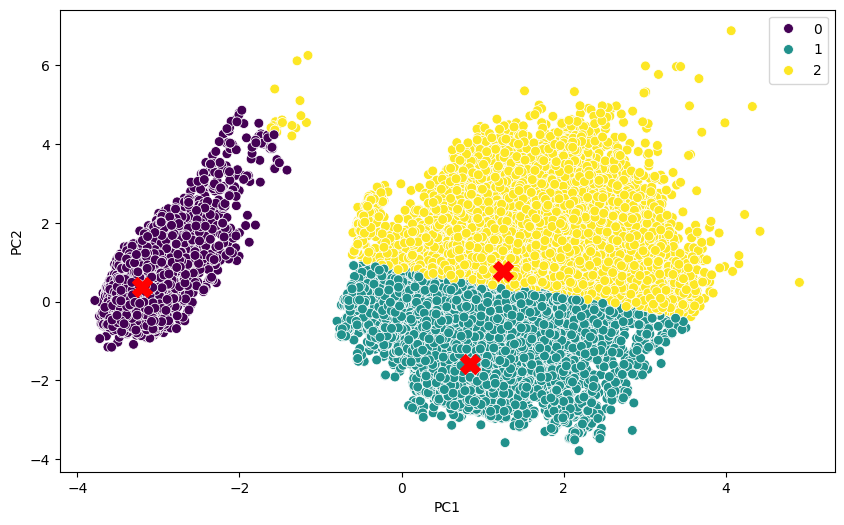

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=clusters, palette='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with Cluster Centers')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

**Justify Your Feature Selection:**

chosen for clustering were the top two principal components (PC1 and PC2), derived using Principal Component Analysis (PCA) on the original dataset

**Number of Clusters Choices:**
number of clusters chosen based on elbow method.

**Evaluation:**

**Metrics Used for Evaluation**
 **Silhouette Score**:
   - The silhouette score was used to evaluate the consistency within clusters. It ranges from -1 to 1, with higher values indicating better-defined and well-separated clusters. It provides an indication of both cohesion and separation, making it an essential metric for clustering evaluation.

   **Silhouette Score** helps to understand how distinct the clusters are from one another, ensuring that each cluster is well-separated.

**Improvements and Recommendations:**